# Practica 1
## Análisis exploratorio de datos y Extracción de Características
## Autor: Diego Tapia

## Desarrollo

### 1. Instalación e importación de librerías

In [2]:
import pandas as pd  
import numpy as np  
import matplotlib.pyplot as plt 
import matplotlib as mpl
import seaborn as sns
import copy

print("Módulos y clases importados")

Módulos y clases importados


### 2. Carga y exploración inicial
Nombre del dataset: Analisis de personalidad de clientes
Enlace : https://www.kaggle.com/datasets/imakash3011/customer-personality-analysis/

Descripcion:
 
El Análisis de la Personalidad del Cliente es un análisis detallado de los clientes ideales de una empresa. Ayuda a una empresa a comprender mejor a sus clientes y facilita la modificación de productos de acuerdo a las necesidades específicas, comportamientos y preocupaciones de diferentes tipos de clientes.

El análisis de la personalidad del cliente ayuda a una empresa a modificar su producto en función de sus clientes objetivos de diferentes segmentos de clientes. Por ejemplo, en lugar de gastar dinero en comercializar un nuevo producto a cada cliente en la base de datos de la empresa, la empresa puede analizar qué segmento de clientes es más probable que compre el producto y luego comercializar el producto solo a ese segmento en particular.

Numero de variables: 29

Numero de instacias: 2240

In [3]:
# Cargar dataframe desde url de csv alojado en repositorio de github
url_dataframe = 'https://raw.githubusercontent.com/juandtap/IA_practica_01/main/marketing_campaign.csv'
# el separador es una tabulacion (\t) y la primera fila son los encabezados (header= 0)
dfOriginal = pd.read_csv(url_dataframe, sep='\t', header=0)
dataframe = copy.deepcopy(dfOriginal)
print("Tamaño del dataset: "+str(dataframe.shape[0])+" filas x "+str(dataframe.shape[1])+" columnas")
# Se muestran las 10 primeros registros
dataframe.head(10)

Tamaño del dataset: 2240 filas x 29 columnas


,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,5,0,0,0,0,0,0,3,11,0
5,7446,1967,Master,Together,62513.0,0,1,09-09-2013,16,520,...,6,0,0,0,0,0,0,3,11,0
6,965,1971,Graduation,Divorced,55635.0,0,1,13-11-2012,34,235,...,6,0,0,0,0,0,0,3,11,0
7,6177,1985,PhD,Married,33454.0,1,0,08-05-2013,32,76,...,8,0,0,0,0,0,0,3,11,0
8,4855,1974,PhD,Together,30351.0,1,0,06-06-2013,19,14,...,9,0,0,0,0,0,0,3,11,1
9,5899,1950,PhD,Together,5648.0,1,1,13-03-2014,68,28,...,20,1,0,0,0,0,0,3,11,0


In [4]:
dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

### Resumen estadístico
Se calcula las medidas descriptivas de las variables que tienen formato numérico

In [5]:
dataframe.describe()

,ID,Year_Birth,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
count,2240.000000,2240.000000,2216.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,...,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.0,2240.0,2240.000000
mean,5592.159821,1968.805804,52247.251354,0.444196,0.506250,49.109375,303.935714,26.302232,166.950000,37.525446,...,5.316518,0.072768,0.074554,0.072768,0.064286,0.013393,0.009375,3.0,11.0,0.149107
std,3246.662198,11.984069,25173.076661,0.538398,0.544538,28.962453,336.597393,39.773434,225.715373,54.628979,...,2.426645,0.259813,0.262728,0.259813,0.245316,0.114976,0.096391,0.0,0.0,0.356274
min,0.000000,1893.000000,1730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
25%,2828.250000,1959.000000,35303.000000,0.000000,0.000000,24.000000,23.750000,1.000000,16.000000,3.000000,...,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
50%,5458.500000,1970.000000,51381.500000,0.000000,0.000000,49.000000,173.500000,8.000000,67.000000,12.000000,...,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
75%,8427.750000,1977.000000,68522.000000,1.000000,1.000000,74.000000,504.250000,33.000000,232.000000,50.000000,...,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
max,11191.000000,1996.000000,666666.000000,2.000000,2.000000,99.000000,1493.000000,199.000000,1725.000000,259.000000,...,20.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.0,11.0,1.000000


### Conclusiones de la exploración inicial (estadisticas)

## 3. Visualización de datos

<Axes: xlabel='Response', ylabel='count'>

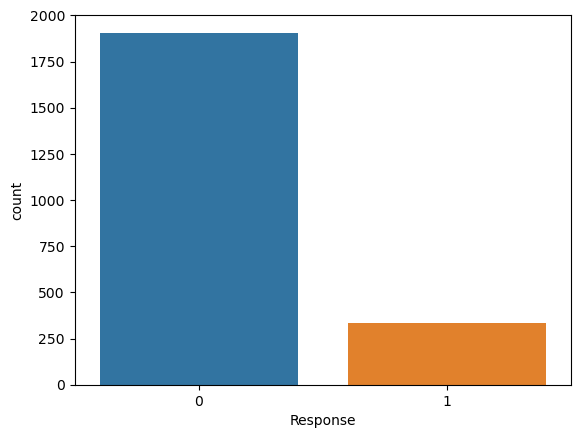

In [20]:
Y = dataframe['Response']
sns.countplot(x=Y)

In [9]:
dataframe['Response'].value_counts()

Response
0    1906
1     334
Name: count, dtype: int64

### Ordenamiento del dataframe por una variable

(Year_Birth)

In [16]:
dataframeTratamiento = dataframe.sort_values(by=['Year_Birth'])
# Mostrar los diez primeros datos
dataframeTratamiento.head(10)

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
239,11004,1893,2n Cycle,Single,60182.0,0,1,17-05-2014,23,8,...,4,0,0,0,0,0,0,3,11,0
339,1150,1899,PhD,Together,83532.0,0,0,26-09-2013,36,755,...,1,0,0,1,0,0,0,3,11,0
192,7829,1900,2n Cycle,Divorced,36640.0,1,0,26-09-2013,99,15,...,5,0,0,0,0,0,1,3,11,0
1950,6663,1940,PhD,Single,51141.0,0,0,08-07-2013,96,144,...,5,0,0,0,0,0,0,3,11,0
424,6932,1941,PhD,Married,93027.0,0,0,13-04-2013,77,1285,...,2,0,0,1,0,0,0,3,11,0
1150,1453,1943,PhD,Widow,57513.0,0,0,06-07-2013,59,735,...,6,0,0,0,0,0,0,3,11,0
415,7106,1943,PhD,Married,75865.0,0,0,31-03-2014,73,483,...,1,0,0,0,0,0,0,3,11,0
2084,5250,1943,Master,Widow,NaN,0,0,30-10-2013,75,532,...,1,0,0,1,0,0,0,3,11,1
358,6142,1943,Master,Married,65073.0,0,0,20-08-2013,65,629,...,2,0,0,0,0,0,1,3,11,0
1923,4994,1943,Master,Single,77598.0,0,0,01-10-2013,53,1193,...,3,0,0,1,0,0,0,3,11,0


### Visualización 2D: varias variables para análisis
Variables: "Year_Birth", "Income"

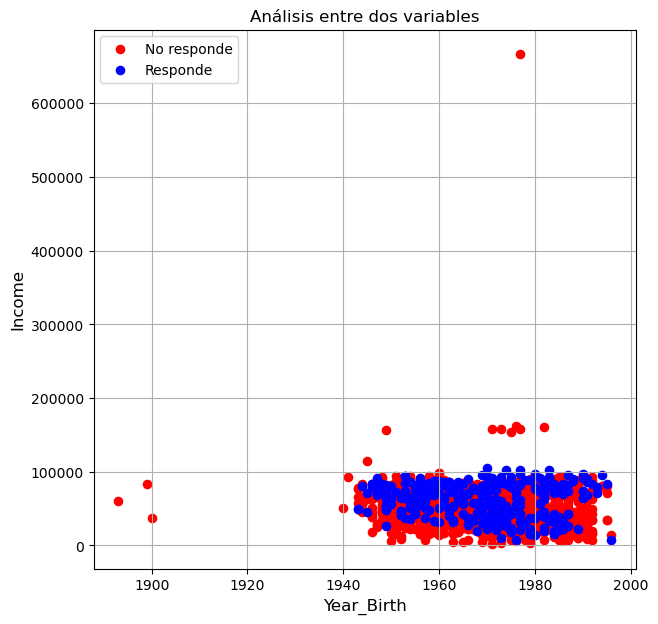

In [34]:
fig = plt.figure(figsize=(7,7))
ax = fig.add_subplot(1,1,1)
ax.set_xlabel('Year_Birth', fontsize =12)
ax.set_ylabel('Income', fontsize = 12)
ax.set_title('Análisis entre dos variables', fontsize = 12)
targets = [0, 1] # Respuesta a la publicidad; 0 no reponde, 1 responde
colors = ['r', 'b']
for target, color in zip(targets, colors):
    indexTokeep = dataframeTratamiento['Response'] == target
    ax.scatter(dataframeTratamiento.loc[indexTokeep, 'Year_Birth'],
               dataframeTratamiento.loc[indexTokeep, 'Income'],
               c = color,
               s = 35 # tamaño de los puntos
               )
ax.legend(['No responde','Responde'])
ax.grid()
plt.show()



### Visualización 2D: una variable para análisis
Variable "Income" (ingreso anual)

C:\Users\juand\AppData\Local\Temp\ipykernel_16984\2573500204.py:1: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-darkgrid')


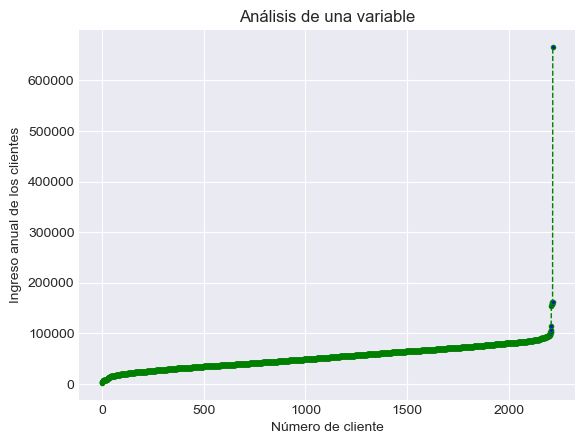

In [36]:
plt.style.use('seaborn-darkgrid')
dataframeTratamientoOrdenado = dataframeTratamiento.sort_values(by=["Income"])
variable_analisis = dataframeTratamientoOrdenado.loc[:,['Income']]
cantidad_muestras = len(dataframeTratamientoOrdenado.index)
array_cantidad_muestras = range(cantidad_muestras)

plt.plot(array_cantidad_muestras, variable_analisis, color= 'green', linestyle="dashed", linewidth = 1, marker='o', markerfacecolor='blue', markersize = 3)
plt.title('Análisis de una variable')
plt.xlabel('Número de cliente')
plt.ylabel('Ingreso anual de los clientes')
plt.show()

## 4. Análisis de variables categóricas

In [37]:
# posible mejora del codigo
def descripcion_cantidad_categorias(dataframe, categorical_features):
    cantidad_total_variables = len(dataframe.columns) # no muestra considerar eliminar
    cantidad_variables_categoricas = len(categorical_features)
    for var in categorical_features:
        cantidad_categorias = dataframe[var].nunique()
        print(f"Cantidad de categorías en la variable {var} : {cantidad_categorias}")
    return cantidad_variables_categoricas


In [40]:

columnas_categoricas = list(dataframe.select_dtypes(include=['object']).columns)
print(columnas_categoricas)

['Education', 'Marital_Status', 'Dt_Customer']


In [42]:
cantidad_variables_categoricas = descripcion_cantidad_categorias(dataframe, columnas_categoricas)
print(f"Cantidad de variables categóricas : {cantidad_variables_categoricas}")


Cantidad de categorías en la variable Education : 5
Cantidad de categorías en la variable Marital_Status : 8
Cantidad de categorías en la variable Dt_Customer : 663
Cantidad de variables categóricas : 3


Hay 3 variables categóricas 

* 'Educacion', 
* 'Estado civil', y 
* 'Fecha inicio del cliente'

De las cuales la variables 'Educacion' y 'Estado civil' son variables categóricas nominales, mientras que la ultima al tratarse de fechas entraria en la categoria ordinal

## 5. Análisis de correlación

### Análisis entre todas las variables

In [43]:
cr = dataframe.corr(numeric_only=True)
cr.head(10)

,ID,Year_Birth,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
ID,1.000000,0.000028,0.013095,0.002406,-0.002580,-0.046524,-0.022878,0.004600,-0.004437,-0.024475,...,-0.007446,-0.036040,-0.025387,-0.007517,-0.021614,-0.015061,0.033883,NaN,NaN,-0.021968
Year_Birth,0.000028,1.000000,-0.161791,0.230176,-0.352111,-0.019871,-0.157773,-0.017917,-0.030872,-0.041625,...,0.121139,0.061774,-0.060510,0.007123,-0.005930,-0.006539,-0.030128,NaN,NaN,0.021325
Income,0.013095,-0.161791,1.000000,-0.428669,0.019133,-0.003970,0.578650,0.430842,0.584633,0.438871,...,-0.553088,-0.016174,0.184400,0.335943,0.276820,0.087545,-0.027225,NaN,NaN,0.133047
Kidhome,0.002406,0.230176,-0.428669,1.000000,-0.036133,0.008827,-0.496297,-0.372581,-0.437129,-0.387644,...,0.447846,0.014674,-0.161600,-0.205634,-0.172339,-0.081716,0.040207,NaN,NaN,-0.080008
Teenhome,-0.002580,-0.352111,0.019133,-0.036133,1.000000,0.016198,0.004846,-0.176764,-0.261160,-0.204187,...,0.134884,-0.042677,0.038886,-0.191050,-0.140090,-0.015605,0.003138,NaN,NaN,-0.154446
Recency,-0.046524,-0.019871,-0.003970,0.008827,0.016198,1.000000,0.016064,-0.004306,0.023056,0.001079,...,-0.021445,-0.032991,0.018826,0.000129,-0.019283,-0.001781,0.013231,NaN,NaN,-0.198437
MntWines,-0.022878,-0.157773,0.578650,-0.496297,0.004846,0.016064,1.000000,0.389637,0.562667,0.399753,...,-0.320653,0.062202,0.373286,0.472613,0.354133,0.205907,-0.039007,NaN,NaN,0.247254
MntFruits,0.004600,-0.017917,0.430842,-0.372581,-0.176764,-0.004306,0.389637,1.000000,0.543105,0.594804,...,-0.418383,0.014727,0.010152,0.215833,0.194748,-0.009773,-0.005166,NaN,NaN,0.125289
MntMeatProducts,-0.004437,-0.030872,0.584633,-0.437129,-0.261160,0.023056,0.562667,0.543105,1.000000,0.568402,...,-0.539470,0.018272,0.102912,0.373769,0.309761,0.043033,-0.023483,NaN,NaN,0.236335
MntFishProducts,-0.024475,-0.041625,0.438871,-0.387644,-0.204187,0.001079,0.399753,0.594804,0.568402,1.000000,...,-0.446003,0.000357,0.016843,0.199578,0.260762,0.002577,-0.020953,NaN,NaN,0.111331


### Un mapa de calor simple

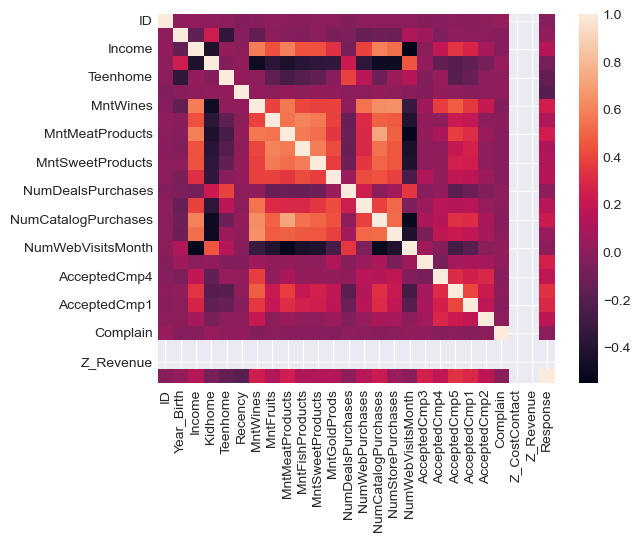

In [44]:
sns.heatmap(cr)
plt.show()